<a href="https://colab.research.google.com/github/AnnCherk/LabsMOMO/blob/main/Lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа 3
_Команда 9_ <br>
_*Куимов, Оплетаев, Подольская, Черкасская*_

##### Представление набора данных

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.interpolate import make_interp_spline
from scipy.stats import gamma
from scipy.stats import geom
from scipy.optimize import minimize
import scipy.stats as stats

In [ ]:
data = pd.read_csv("titanic.csv", delimiter=",", header=0)

# Создание подвыборки с выбранными переменными
subset = data[['Age','Fare','SibSp','Parch']]

In [ ]:
print('Исходные данные:')
data.head() # Представление данных

Исходные данные:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print('Подвыборка:')
subset.head()

Подвыборка:


,Age,Fare,SibSp,Parch
0,22.0,7.2500,1,0
1,38.0,71.2833,1,0
2,26.0,7.9250,0,0
3,35.0,53.1000,1,0
4,35.0,8.0500,0,0


Был выбран датасет titanic c данными о пассажирах судна.

В качестве подвыборки было выбрано 4 величины: Age (непрерывная, возраст), Fare (непрерывная, плата за проезд), SibSp (дискретная, количество братьев и сестер/супругов на борту), Parch (дискретная, количество родителей и детей, находившихся на борту с пассажиром).



---



##### Непараметрическая оценка плотности распределения в виде гистограммы и используя функцию плотности ядра / закона вероятности

1) В виде гистрограммы

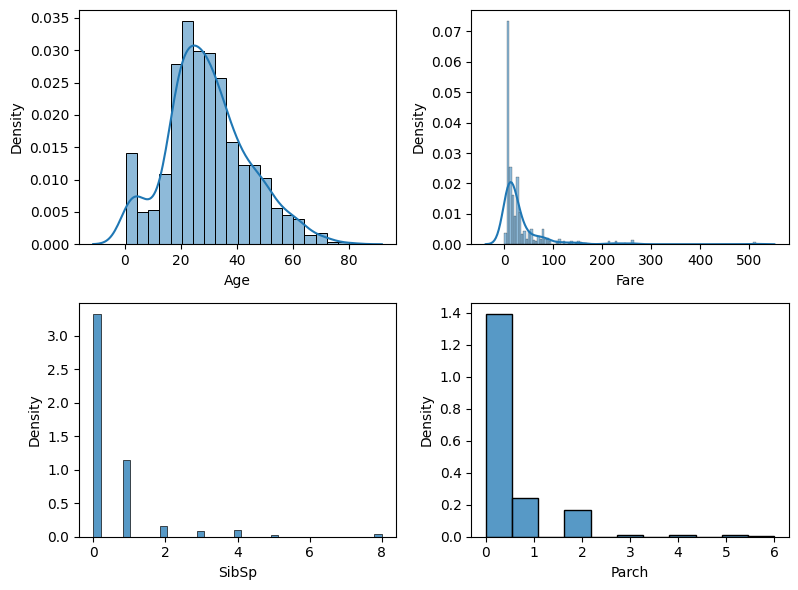

In [ ]:
fig, axes = plt.subplots(2,2, figsize=(8,6))

sns.histplot(subset['Age'], kde=True, stat="density", kde_kws=dict(cut=3), ax=axes[0,0])
sns.histplot(subset['Fare'], kde=True, stat="density", kde_kws=dict(cut=3), ax=axes[0,1])
sns.histplot(subset['SibSp'], kde=False, stat="density", kde_kws=dict(cut=3), ax=axes[1,0])
sns.histplot(subset['Parch'], kde=False, stat="density", kde_kws=dict(cut=3), ax=axes[1,1])

plt.tight_layout()
plt.show()

2) Использование функции плотности ядра


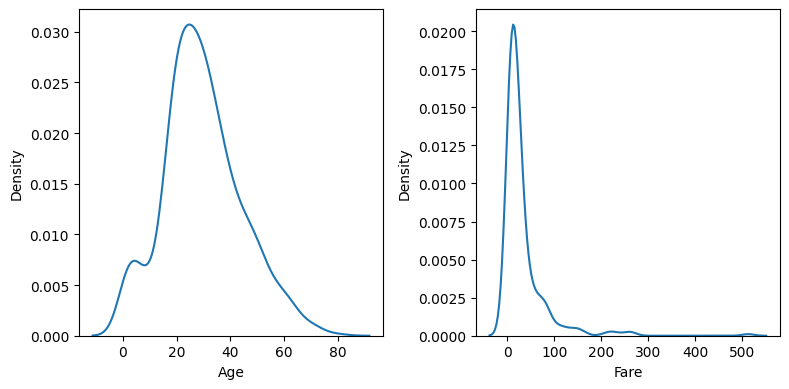

In [ ]:
# Непараметрическая оценка плонтости распределения непрерывных величин
fig, axes = plt.subplots(1,2, figsize=(8,4))

sns.kdeplot(data=subset['Age'], ax=axes[0])
sns.kdeplot(data=subset['Fare'], ax=axes[1])

plt.tight_layout()
plt.show()

Из непараметрической оценки плотности распределения Age видно, что теоретическое распределение должно состоять из смеси двух распределений.

Оценка плотности распределения Fare может быть описана одним теоретическим распределением.

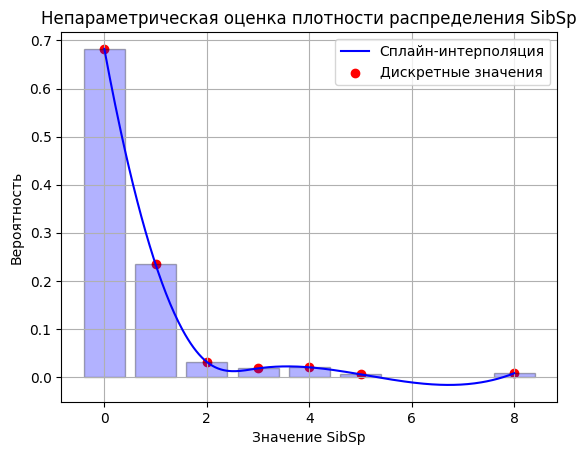

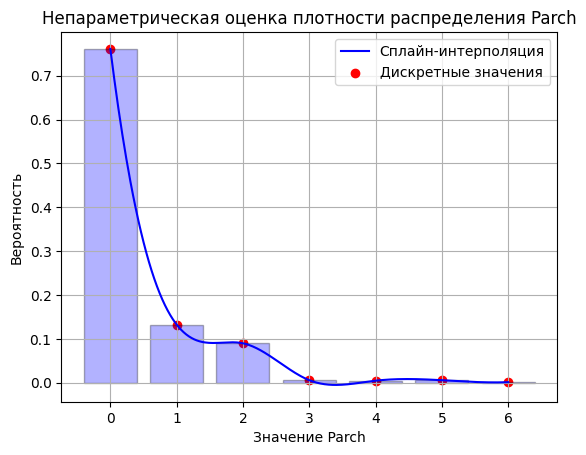

In [ ]:
# Создание графиков для дискретных величин

sibsp_counts = subset['SibSp'].value_counts().to_dict()
# Вычисление общего количества
total_counts = sum(sibsp_counts.values())

# Вычисление вероятностей
sibsp_counts = {k: v / total_counts for k, v in sibsp_counts.items()}

# Преобразование данных в два массива: x (значения Parch) и y (количество)
x = np.array(list(sibsp_counts.keys()))
y = np.array(list(sibsp_counts.values()))

# Сортировка данных
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Создание сплайн-интерполяции
spline = make_interp_spline(x_sorted, y_sorted, k=3)  # k=3 указывает на кубический сплайн
x_new = np.linspace(min(x_sorted), max(x_sorted), 300)
y_new = spline(x_new)

# Построение сплайн-графика
plt.plot(x_new, y_new, label='Сплайн-интерполяция', color='b')
plt.scatter(x_sorted, y_sorted, color='r', label='Дискретные значения')
plt.bar(x_sorted, y_sorted, alpha=0.3, color='b', edgecolor='black')

plt.title('Непараметрическая оценка плотности распределения SibSp')
plt.xlabel('Значение SibSp')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()


parch_counts = subset['Parch'].value_counts().to_dict()
# Вычисление общего количества
total_counts = sum(parch_counts.values())

# Вычисление вероятностей
parch_counts = {k: v / total_counts for k, v in parch_counts.items()}

# Преобразование данных в два массива: x (значения Parch) и y (количество)
x = np.array(list(parch_counts.keys()))
y = np.array(list(parch_counts.values()))

# Сортировка данных
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Создание сплайн-интерполяции
spline = make_interp_spline(x_sorted, y_sorted, k=3)  # k=3 указывает на кубический сплайн
x_new = np.linspace(min(x_sorted), max(x_sorted), 300)
y_new = spline(x_new)

# Построение сплайн-графика
plt.plot(x_new, y_new, label='Сплайн-интерполяция', color='b')
plt.scatter(x_sorted, y_sorted, color='r', label='Дискретные значения')

plt.bar(x_sorted, y_sorted, alpha=0.3, color='b', edgecolor='black')

plt.title('Непараметрическая оценка плотности распределения Parch')
plt.xlabel('Значение Parch')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()

Был использован закон вероятности для построения непараметрической оценки плотности распределения дискретных СВ SibSp и Parch.

Для наглядности данных была проведена интерполяция сплайнами.



---



##### Оценка порядковых статистик и представление их в виде “ящиков с усами”

In [ ]:
subset.describe()

,Age,Fare,SibSp,Parch
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.523008,0.381594
std,14.526497,49.693429,1.102743,0.806057
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,38.000000,31.000000,1.000000,0.000000
max,80.000000,512.329200,8.000000,6.000000


In [ ]:
# Оценка порядковых статистик
subset_clean=subset.dropna() #Удаление неизвсестных значений
for var in subset.columns:
  print('Оценка дополнительных порядковых статистик для {}'.format(var))

  # Верхний и нижний квартили
  q1 = np.percentile(subset_clean[var], 25)
  q2 = np.percentile(subset_clean[var], 75)

  # Межквартильное расстояние
  iqr = q2 - q1
  print("Межквартильное расстояние:", iqr)

  # Усы
  lower_whisker = q1 - 1.5 * iqr
  if lower_whisker < 0:
    lower_whisker=0
  upper_whisker = q2 + 1.5 * iqr
  print("Нижний ус:", lower_whisker)
  print("Верхний ус:", upper_whisker, "\n")

Оценка дополнительных порядковых статистик для Age
Межквартильное расстояние: 17.875
Нижний ус: 0
Верхний ус: 64.8125 

Оценка дополнительных порядковых статистик для Fare
Межквартильное расстояние: 25.325
Нижний ус: 0
Верхний ус: 71.3625 

Оценка дополнительных порядковых статистик для SibSp
Межквартильное расстояние: 1.0
Нижний ус: 0
Верхний ус: 2.5 

Оценка дополнительных порядковых статистик для Parch
Межквартильное расстояние: 1.0
Нижний ус: 0
Верхний ус: 2.5 



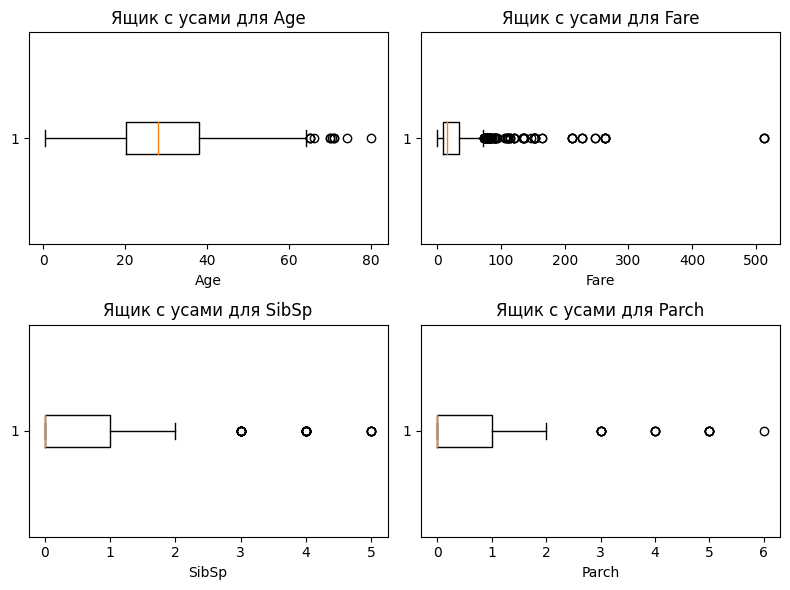

In [ ]:
# Представление оценки порядковых статистик в виде "ящиков с усами"
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
var_idx = 0

for i in range(2):
    for j in range(2):
        var = subset.columns[var_idx]
        boxplotData = sorted(subset_clean[var].values)
        axes[i, j].boxplot(boxplotData, vert=False)
        axes[i, j].set_xlabel('{}'.format(var))
        axes[i, j].set_title('Ящик с усами для {}'.format(var))
        var_idx += 1

plt.tight_layout()
plt.show()

**Age**: основные значения СВ лежат от 0 до 64.8. Значение 29.7 - медиана, она не сильно смещена относительно цента "ящика".

**Fare**: основные значения СВ лежат от 0 до 71.4, "ящик" смещен ближе к 0, максимальное значение 500. Значение 32.2 - медиана, смещена относительно цента "ящика" ближе к меньшим значениям. Большинство пассажиров предпочли купить достаточно дешевые билеты, с увеличением цены количество купленных билетов уменьшается.

**SibSp**: основные значения СВ лежат от 0 до 1. Значение 0 - медиана. Все значения величины количества братьев и сестер/супругов на борту больше двух являются выбросами. Большинство людей на судне не имело родственников на судне.

**Parch**: аналогично основные значения СВ лежат от 0 до 1. Значение 0 - медиана. Все значения величины количества родителей/детей на борту больше двух являются выбросами. Это подтвержает вывод для предыдущей СВ, что большинство людей на судне не путешествовали с родственниками.



---



##### Теоретические распределения, описывающие выборку

Нахождение теоретического распределния для величины Age (смесь гамма распределений).

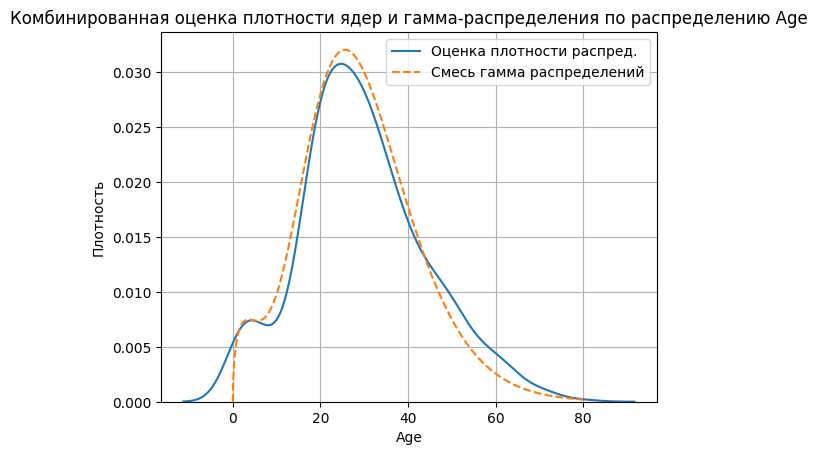

In [ ]:
# Разделение данных на две группы
kids = subset[subset['Age'] <= 13]['Age']
parents = subset[subset['Age'] > 13]['Age']

# Расчет весовых коэффициентов
total_kids = len(kids)
total_parents = len(parents)
weight_kids = total_kids / (total_kids + total_parents)

# Подобранные параметры двух гамма распределений
gamma_shape_kids = 1.5
gamma_scale_kids = 6.5
gamma_shape_parents = 6.3
gamma_scale_parents = 4.9

x = np.linspace(0, max(subset['Age']), 1000)

#Функция для построения смеси гамма распределений
def gamma_mixture(weight_kids, gamma_shape_kids, gamma_scale_kids, gamma_shape_parents, gamma_scale_parents, x, label):
  weight_parents =  1 - weight_kids
  gamma_pdf_kids = gamma.pdf(x, a=gamma_shape_kids, scale=gamma_scale_kids)
  gamma_pdf_parents = gamma.pdf(x, a=gamma_shape_parents, scale=gamma_scale_parents)

  # Объедините гамма-распределений с учетом весов
  combined_pdf = weight_kids * gamma_pdf_kids + weight_parents * gamma_pdf_parents

  plt.plot(x, combined_pdf, label=label, linestyle='--')

sns.kdeplot(data=data['Age'], label='Оценка плотности распред.')
gamma_mixture(weight_kids, gamma_shape_kids, gamma_scale_kids, gamma_shape_parents, gamma_scale_parents, x, label='Смесь гамма распределений')

plt.title('Комбинированная оценка плотности ядер и гамма-распределения по распределению Age')
plt.xlabel('Age')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

Исходя из полученных непараметрических распределений был сделан вывод, что СВ Age может быть описана **смесью двух гамма-распределений**. Ниже были вручную подобраны параметры гамма-распределений для проверки догадки. Далее эти параметры будут оценены с помощью Метода максимального правдоподобия(ММП) и Метода наименьших квадратов (МНК).

Таким образом, в дальнейшем анализе все данные о возврасте будут разделены на две условные части: дети (не более 13 лет) и родители (более 13 лет).

Нахождение теоретического распределния для величины Fare (гамма распределение).

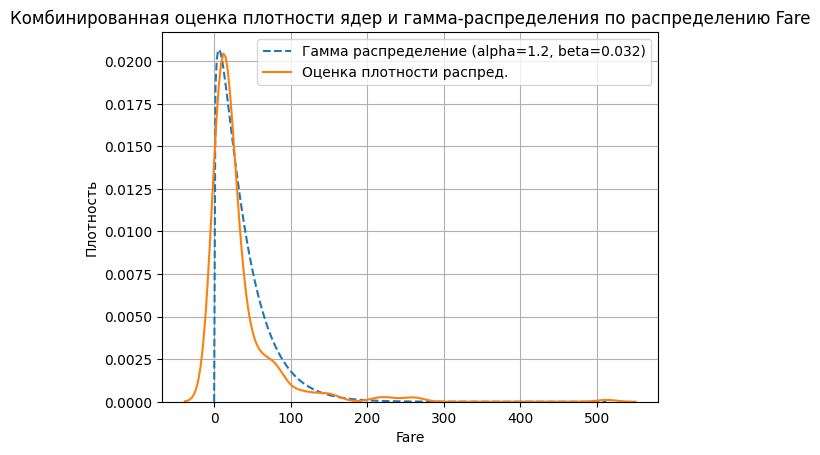

In [ ]:
alpha = 1.2 # параметр формы (shape) гамма-распределения
beta = 0.032  # параметр масштаба (scale) гамма-распределения
x_gamma = np.linspace(0, max(subset['Fare']), 300)
y_gamma = gamma.pdf(x_gamma, alpha, scale=1/beta)

plt.plot(x_gamma, y_gamma, label=f'Гамма распределение (alpha={alpha}, beta={beta})', linestyle='--')
sns.kdeplot(data=subset['Fare'], label='Оценка плотности распред.')

plt.title('Комбинированная оценка плотности ядер и гамма-распределения по распределению Fare')
plt.xlabel('Fare')
plt.ylabel('Плотность')
plt.grid(True)
plt.legend()

Для величины Fare было выбрано **гамма-распределение**. Ниже представлен график с оценкой плотности распределения и гамма-распределением, подобранным вручную.

Нахождение теоретического распределния для величины SibSp.

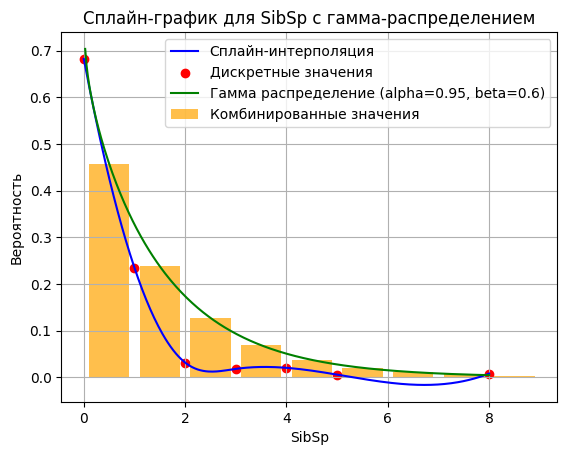

In [ ]:
# Вычисление общего количества
total_counts = sum(sibsp_counts.values())

# Вычисление вероятностей
sibsp_counts = {k: v / total_counts for k, v in sibsp_counts.items()}

# Преобразование данных в два массива: x (значения sibsp) и y (количество)
x = np.array(list(sibsp_counts.keys()))
y = np.array(list(sibsp_counts.values()))

# Сортировка данных
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Создание сплайн-интерполяции
spline = make_interp_spline(x_sorted, y_sorted, k=3)  # k=3 указывает на кубический сплайн
x_new = np.linspace(min(x_sorted), max(x_sorted), 300)
y_new = spline(x_new)

# Построение сплайн-графика
plt.plot(x_new, y_new, label='Сплайн-интерполяция', color='b')
plt.scatter(x_sorted, y_sorted, color='r', label='Дискретные значения')

# Добавление гамма-распределения
alpha = 0.95 # параметр формы (shape) гамма-распределения
beta = 0.6  # параметр масштаба (scale) гамма-распределения
x_gamma = np.linspace(0, max(x_sorted), 300)
y_gamma = gamma.pdf(x_gamma, alpha, scale=1/beta)

x_gamma_discrete = [x + 0.5 for x in range (9)]
y_gamma_discrete = gamma.pdf(x_gamma_discrete, alpha, scale=1/beta)

# print(x_gamma)
plt.bar(x_gamma_discrete, y_gamma_discrete, label='Комбинированные значения', alpha=0.7, color='orange')

plt.plot(x_gamma, y_gamma, label=f'Гамма распределение (alpha={alpha}, beta={beta})', color='g')

plt.title('Сплайн-график для SibSp с гамма-распределением')
plt.xlabel('SibSp')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()

Из-за формы интерполированного распределния величины SibSp было предложено гамма-распределение в качестве теоретического распределения. Непрерывное гамма-распределение было продискретизировано для построения распределения дискретной СВ. Как видно из графика, гамма распределение плохо подходит для распределения SibSp.

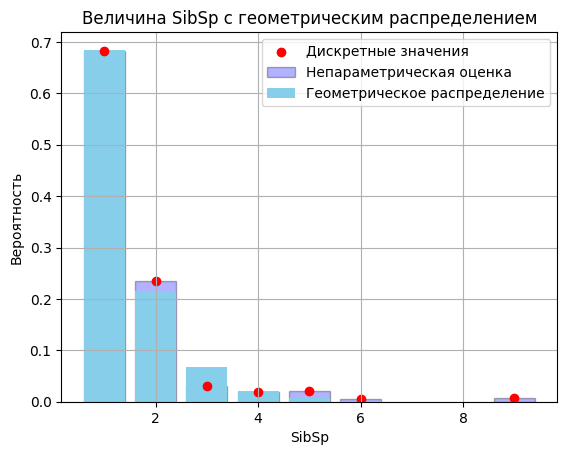

In [ ]:
sibsp_counts = data['SibSp'].value_counts().to_dict()
# Вычисление общего количества
total_counts = sum(sibsp_counts.values())

# Вычисление вероятностей
sibsp_counts = {k: v / total_counts for k, v in sibsp_counts.items()}

# Преобразование данных в два массива: x (значения Parch) и y (количество)
x = np.array(list(sibsp_counts.keys()))
y = np.array(list(sibsp_counts.values()))

# Сортировка данных
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Геометрическое распределение
probability_mass_function = geom.pmf(x_sorted+1, 0.685) # Параметр, подобранный вручную

# Построение графиков
plt.title('Величина SibSp с геометрическим распределением')
plt.bar(x_sorted+1, y_sorted, alpha=0.3, color='b', edgecolor='black', label='Непараметрическая оценка')
plt.bar(x_sorted+1, probability_mass_function, color='skyblue', label='Геометрическое распределение')
plt.scatter(x_sorted+1, y_sorted, color='r', label='Дискретные значения')
plt.xlabel('SibSp')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()

Было выбрано **геометрическое распределение** дискретной случайной величины.

При его построении значения SibSp были сдивинуты на единицу, т.к. геометрическое распределение не определено в 0.
Теперь значения по оси х можно интерперетировать как номера испытаний: 1 испытание - значение SibSp = 0 и т.д.
Как видно из графика, геометрическое распределение близко к распределению СВ SibSp.

Нахождение теоретического распределния для величины Parch.

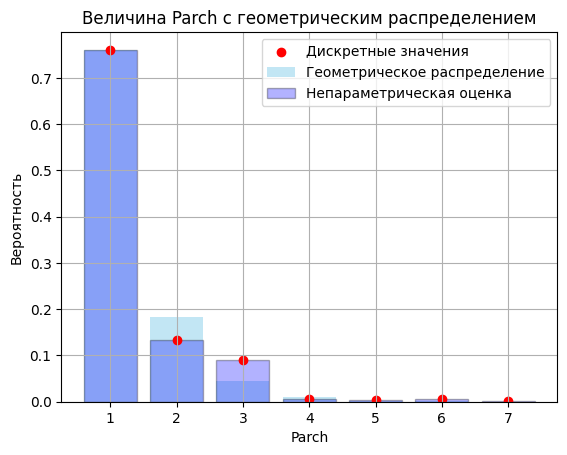

In [ ]:
# Данные
total_counts = sum(parch_counts.values())

# Вычисление вероятностей
parch_counts = {k: v / total_counts for k, v in parch_counts.items()}

x = np.array(list(parch_counts.keys()))
y = np.array(list(parch_counts.values()))

sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Геометрическое распределение
probability_mass_function = geom.pmf(x_sorted+1, 0.76) # Параметр, подобранный вручную

# Построение графиков
plt.title('Величина Parch с геометрическим распределением')
plt.bar(x_sorted+1, probability_mass_function, color='skyblue', alpha=0.5, label='Геометрическое распределение')
plt.bar(x_sorted+1, y_sorted, alpha=0.3, color='b', edgecolor='black', label='Непараметрическая оценка')
plt.scatter(x_sorted+1, y_sorted, color='r', label='Дискретные значения')
plt.xlabel('Parch')
plt.ylabel('Вероятность')
plt.legend()
plt.grid(True)
plt.show()

Для величины Parch также было выбрано **геометрическое распределение**.

Здесь и далее данные также сдвинуты на 1 в силу неопределенности геометрического распределения в 0.



---



##### Оценка параметров выбранных распределений, с помощью метода максимального правдоподобия и метода наименьших квадратов

1. Для случайной величины Age

In [ ]:
def fit_gamma_mixture_MLE(d1, d2, weight = weight_kids):
    params1 = gamma.fit(d1)
    params2 = gamma.fit(d2)

    # Параметры смеси двух гамма-распределений
    alpha1, loc1, scale1 = params1
    alpha2, loc2, scale2 = params2

    # Возвращаем параметры смеси
    return alpha1, loc1, scale1, alpha2, loc2, scale2, weight

alpha1, loc1, scale1, alpha2, loc2, scale2, weight = fit_gamma_mixture_MLE(kids, parents)
print("Оцененные параметры смеси гамма-распределений(MLE):")
print(f"Параметры первого гамма-распределения: alpha={alpha1}, loc={loc1}, scale={scale1}")
print(f"Параметры второго гамма-распределения: alpha={alpha2}, loc={loc2}, scale={scale2}")

Оцененные параметры смеси гамма-распределений(MLE):
Параметры первого гамма-распределения: alpha=1.1431921741493427, loc=0.4074528168107498, scale=4.019380037297855
Параметры второго гамма-распределения: alpha=2.1633709065577422, loc=13.086537562885319, scale=8.93956293773639


Параметр loc отвечает за сдвиг по оси x, где начинается гамма-распределение. Вторая группа данных (parents) сдвинута на 13 единиц, что соответсвует выбранному разделению данных.

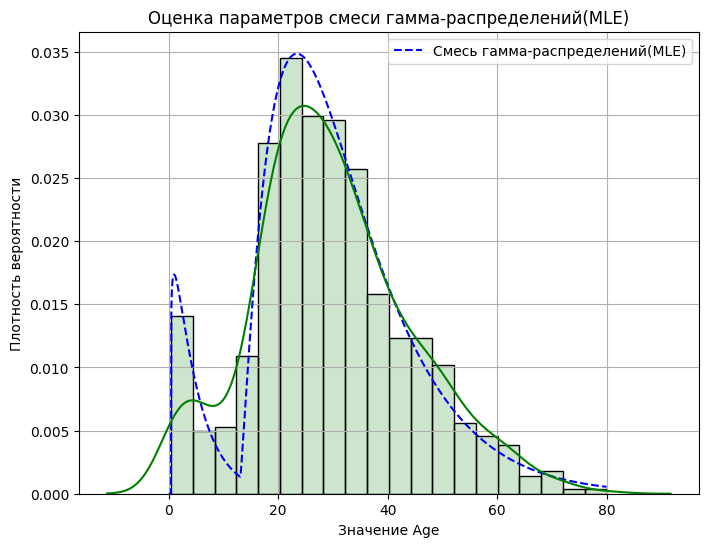

In [ ]:
# Создание данных для графика смеси гамма-распределений
x = np.linspace(0, max(subset['Age']), 1000)
mixture_pdf = weight * gamma.pdf(x, alpha1, loc=loc1, scale=scale1) + (1 - weight) * gamma.pdf(x, alpha2, loc=loc2, scale=scale2)

# Построение графика смеси гамма-распределений
plt.figure(figsize=(8, 6))
plt.plot(x, mixture_pdf, label='Смесь гамма-распределений(MLE)', color='b', linestyle='--')

sns.histplot(subset['Age'], kde=True, stat="density", color='g', alpha=0.2, kde_kws=dict(cut=3))
plt.xlabel('Значение Age')
plt.ylabel('Плотность вероятности')
plt.title('Оценка параметров смеси гамма-распределений(MLE)')
plt.legend()
plt.grid(True)
plt.show()

Был применен метод fit для гамма-распределения из библиотеки Scipy.Stats для оценки параметров смеси гамма-распределений методом максимального правдоподобия. С оцененными параметрами был построен график, из которого видно, что смесь достаточно хорошо описывает данные.

In [ ]:
# Оптимизация параметров методом наименьших квадратов
def fit_gamma_MLS(data, params):
    def loss(params, data):
        data=data.dropna()
        alpha, scale = params
        x = np.linspace(min(data), max(data), len(data))
        y = np.histogram(data, bins=len(data), density=True)[0]

        # Вычисление суммы квадратов разностей между теоретическими и эмпирическими значениями
        return np.sum((y - gamma.pdf(x, alpha, scale=scale)) ** 2)

    # Определение границ для параметров
    bounds = [(0, None), (0, None)]  # alpha, loc, scale должны быть положительными

    result = minimize(loss, params, args=(data,), method='L-BFGS-B', bounds=bounds)

    # Получение оптимальных параметров гамма-распределения
    alpha, scale = result.x
    return alpha,  scale

Оцененные параметры смеси гамма-распределений(MLS):
Параметры первого гамма-распределения: alpha=0.9907034084494419, scale=5.152268982908068
Параметры второго гамма-распределения: alpha=5.933365727284772, scale=5.057213430802365


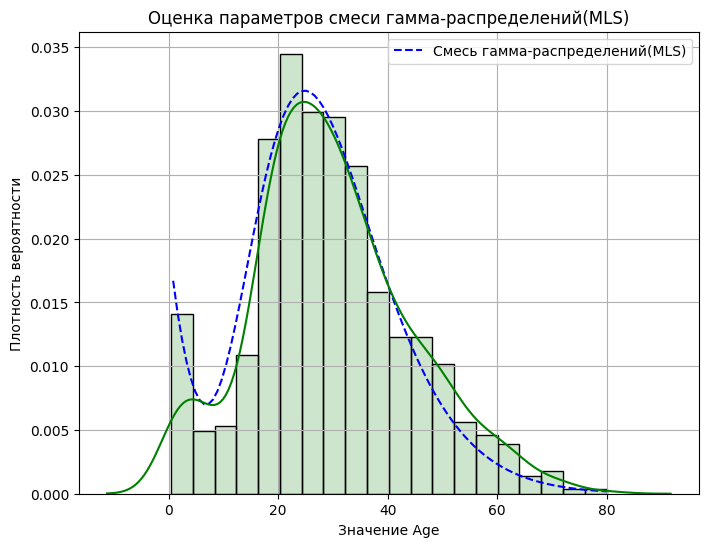

In [ ]:
# Начальные значения параметров для детей и родителей
initial_params_kids = [1.5, 6.5]
initial_params_parents = [6.3, 4.9]

alpha_1, scale_1 = fit_gamma_MLS(kids, initial_params_kids)
alpha_2, scale_2 = fit_gamma_MLS(parents, initial_params_parents)

print("Оцененные параметры смеси гамма-распределений(MLS):")
print(f"Параметры первого гамма-распределения: alpha={alpha_1}, scale={scale_1}")
print(f"Параметры второго гамма-распределения: alpha={alpha_2}, scale={scale_2}")

# Создание данных для графика смеси гамма-распределений
x = np.linspace(0, max(subset['Age']), 100)
weight=weight_kids
mixture_pdf = weight * gamma.pdf(x, alpha_1, scale=scale_1) + (1 - weight) * gamma.pdf(x, alpha_2, scale=scale_2)

# Построение графика смеси гамма-распределений
plt.figure(figsize=(8, 6))
plt.plot(x, mixture_pdf, label='Смесь гамма-распределений(MLS)', color='b', linestyle='--')

sns.histplot(subset['Age'], kde=True, stat="density", color='g', alpha=0.2, kde_kws=dict(cut=3))
plt.xlabel('Значение Age')
plt.ylabel('Плотность вероятности')
plt.title('Оценка параметров смеси гамма-распределений(MLS)')
plt.legend()
plt.grid(True)
plt.show()

На основе МНК также удалось подобрать параметры смеси распределений. На рисунке видно, что оценненое распределение повторяет форму исходных данных.


2. Для случайной величины Fare

In [ ]:
def mmp_gamma(data_gamma):
  data_gamma = np.where(data_gamma == 0, 0.001, data_gamma)
  # Функция правдоподобия для смещенного гамма-распределения
  def likelihood(params):
    alpha, beta = params
    return -np.sum(np.log(gamma.pdf(data_gamma, a = alpha, scale = 1/beta)))
  # Инициализация начальных значений параметров
  initial_guess = [1, 1] # Начальные значения для shape, scale и shift
  # Минимизация отрицательного логарифма правдоподобия
  result = minimize(likelihood, initial_guess, method='Nelder-Mead') # Оцененные параметры
  return result.x[0], 1 / result.x[1]

print("Оценка параметров Fare ММП гамма:")
print("Форма (shape):", round(mmp_gamma(subset['Fare'])[0],4))
print("Масштаб (scale):", round(mmp_gamma(subset['Fare'])[1],4))


print("Оценка параметров Fare ММП нормальное:")

Оценка параметров Fare ММП:
Форма (shape): 0.8481
Масштаб (scale): 37.9717


В приведенном выше коде вместо максимизации функции правдоподобия L(θ), мы минимизируем отрицательный логарифм функции правдоподобия –log(L(θ)) (функция возвращает отрицательную сумму логарифмов плотностей вероятности для данных), что эквивалентно максимизации исходной функции правдоподобия.

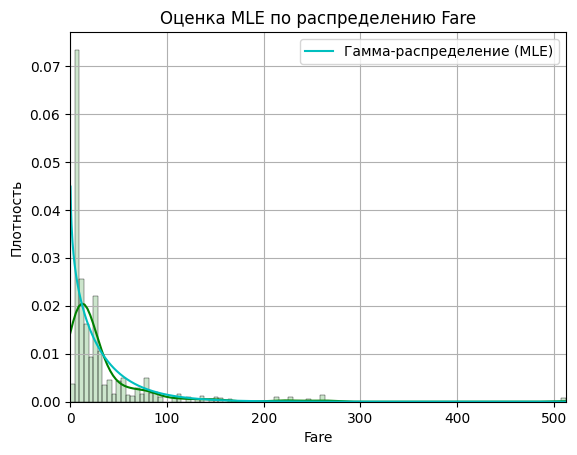

In [ ]:
x_gamma = np.linspace(0, subset['Fare'].max(), 1000)
y_gamma = gamma.pdf(x_gamma, alpha, scale=1/beta)

sns.histplot(subset['Fare'], kde=True, stat="density", color='g', alpha=0.2, kde_kws=dict(cut=3))
plt.plot(x_gamma, gamma.pdf(x_gamma, a=mmp_gamma(subset['Fare'])[0],scale=mmp_gamma(subset['Fare'])[1]), label=f'Гамма-распределение (MLE)', color='c')
plt.xlim(0, subset['Fare'].max())
plt.title('Оценка MLE по распределению Fare')
plt.xlabel('Fare')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

Полученное теоретическое распределение близко к исходным данным.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_distn_infrastructure.py:1983: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Оцененный alpha: 2.8067388415957555
Оцененный scale: 4.829230415342039


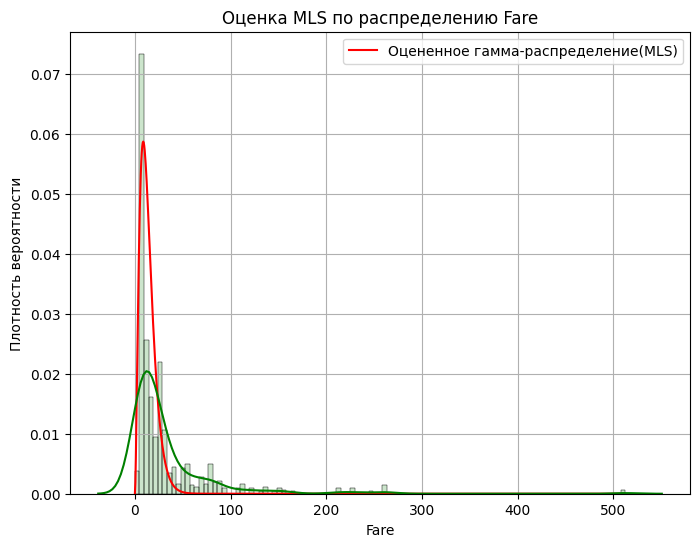

In [ ]:
initial_params_fare=[1.2, 31.25]

alpha4, scale4 = fit_gamma_MLS(subset['Fare'], initial_params_fare)
print(f"Оцененный alpha: {alpha4}")
print(f"Оцененный scale: {scale4}")

# Построение графика для исходных данных и оцененного гамма-распределения
plt.figure(figsize=(8, 6))
x = np.linspace(0, max(subset['Fare']), 1000)

plt.plot(x, gamma.pdf(x, alpha4, scale=scale4), label='Оцененное гамма-распределение(MLS)', color='r')
sns.histplot(subset['Fare'], kde=True, stat="density", color='g', alpha=0.2, kde_kws=dict(cut=3))

plt.xlabel('Fare')
plt.ylabel('Плотность вероятности')
plt.title('Оценка MLS по распределению Fare')
plt.legend()
plt.grid(True)
plt.show()

Оцененное гамма-распределение Fare на основе МНК повторяет форму графика и достаточно хорошо описывает данные.



---



In [ ]:
# Функция для оценки параметра геометрического распределения на основе ММП
def mmp_geom(p, data):
    # Добавление маленького значения для избежания деления на ноль
    epsilon = 1e-15
    p = max(p, epsilon)
    return -np.sum(np.log(p) + (1 - p) * np.log(1 - p + epsilon) ** (data - 1))

В случае дискретного геометрического распределения, где
p представляет вероятность успеха (например, значение переменной равно 1), функция правдоподобия имеет вид:
\begin{align}
         L(p)=p^k ⋅ (1-p)^{n-k}
\end{align}
где k - количество успехов, n - общее количество наблюдений.
Логарифм функции правдоподобия для дискретного геометрического распределения:
\begin{align}
         log L(p)=k \cdot log(p) + (n-k)\cdot log(1-p)
\end{align}

Чтобы найти MLE-оценку параметра p, мы максимизируем логарифм функции правдоподобия по p. Решение этой задачи оптимизации приводит к
\begin{align}
         p=\frac{1}{\bar{x}}.
\end{align}

In [ ]:
# Оценка параметра p для SibSp
p_sibsp_mle = 1 / (subset['SibSp']+1).mean()

# Оценка параметра p для Parch
p_parch_mle = 1 / (subset['Parch']+1).mean()

print("MLE-оценка параметра p для SibSp:", round(p_sibsp_mle,3))
print("MLE-оценка параметра p для Parch:", round(p_parch_mle, 3))

MLE-оценка параметра p для SibSp: 0.657
MLE-оценка параметра p для Parch: 0.724


Были получены оценки параметров геометрических распределений для величин SibSp и Parch на основе ММП.

МНК применить к дискретным данным нельзя, т.к. этот метод предназначен для непрерывных величин.

3. Для случайной величины SibSp


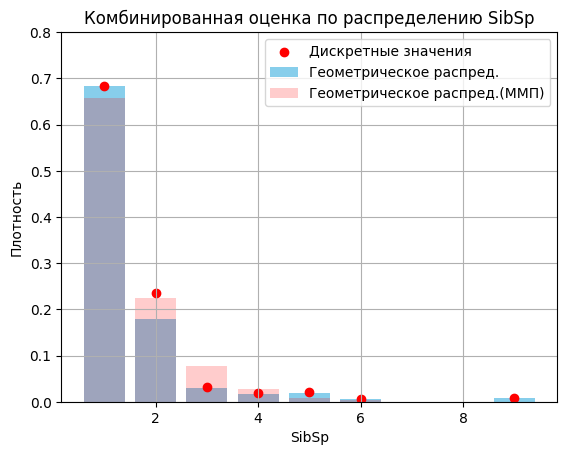

In [ ]:
plt.ylim(0,0.8)

sibsp_counts = (data['SibSp']).value_counts().to_dict()
# Вычисление общего количества
total_counts = sum(sibsp_counts.values())

# Вычисление вероятностей
sibsp_counts = {k: v / total_counts for k, v in sibsp_counts.items()}

# Преобразование данных в два массива: x (значения Parch) и y (количество)
x = np.array(list(sibsp_counts.keys()))
y = np.array(list(sibsp_counts.values()))

# Сортировка данных
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]+1
y_sorted = y[sorted_indices]

x_new = np.linspace(min(x_sorted), max(x_sorted), 300)
y_new = spline(x_new)

probability_mass_function = geom.pmf(x_sorted, y_sorted)
plt.bar(x_sorted, probability_mass_function, color='skyblue', label='Геометрическое распред.')
plt.scatter(x_sorted, y_sorted, color='r', label='Дискретные значения')

# Результаты оценненых параметров
prob_mass_func_sibsp = geom.pmf(x_sorted, p_sibsp_mle)
prob_mass_func_sibsp[0] += 0.001512988
plt.bar(x_sorted, prob_mass_func_sibsp, color='red', alpha=0.2, label='Геометрическое распред.(ММП)')

plt.title('Комбинированная оценка по распределению SibSp')
plt.xlabel('SibSp')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

Из графика видно, что полученное геометрическое распределение близко к закону распределния SibSp.

Оценка на основе МНК не была проведена, т.к. МНК предназначен для непрерывных моделей.

4. Для случайной величины Parch

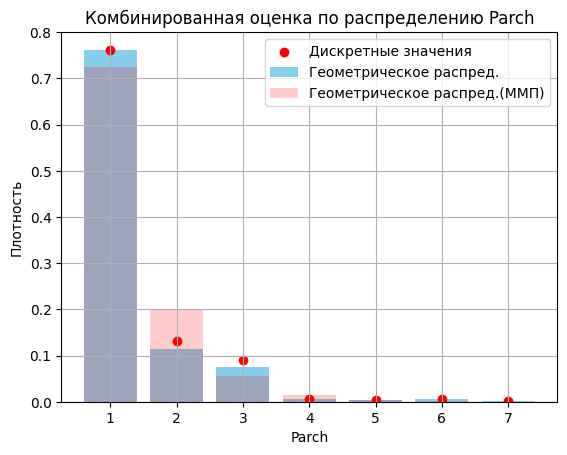

In [ ]:
plt.ylim(0,0.8)

parch_counts = data['Parch'].value_counts().to_dict()
# Вычисление общего количества
total_counts = sum(parch_counts.values())

# Вычисление вероятностей
parch_counts = {k: v / total_counts for k, v in parch_counts.items()}

# Преобразование данных в два массива: x (значения Parch) и y (количество)
x = np.array(list(parch_counts.keys()))
y = np.array(list(parch_counts.values()))

# Сортировка данных
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]+1
y_sorted = y[sorted_indices]

# Построение графика
probability_mass_function = geom.pmf(x_sorted, y_sorted)
plt.bar(x_sorted, probability_mass_function, color='skyblue', label='Геометрическое распред.')
plt.scatter(x_sorted, y_sorted, color='r', label='Дискретные значения')

# Результаты оценненых параметров
prob_mass_func_parch = geom.pmf(x_sorted, p_parch_mle)
prob_mass_func_parch[0]+=0.000122615
plt.bar(x_sorted, prob_mass_func_parch, color='red', alpha=0.2, label='Геометрическое распред.(ММП)')

plt.title('Комбинированная оценка по распределению Parch')
plt.xlabel('Parch')
plt.ylabel('Плотность')
plt.legend()
plt.grid(True)
plt.show()

Из графика видно, что полученное геометрическое распределение близко к закону распределния Parch.



---



##### Проверка оцененных параметров с помощью графика квантиль-квантиль (QQ)

In [ ]:
# Генерирация случайной выборки из расчетных гамма-распределений
kids_samples_MLE = stats.gamma.rvs(a=alpha1, loc=loc1, scale=scale1, size=len(kids))
parents_samples_MLE = stats.gamma.rvs(a=alpha2, loc=loc2, scale=scale2, size=len(parents))

kids_samples_MLS = stats.gamma.rvs(a=alpha_1, scale=scale_1, size=len(kids))
parents_samples_MLS = stats.gamma.rvs(a=alpha_2, scale=scale_2, size=len(parents))

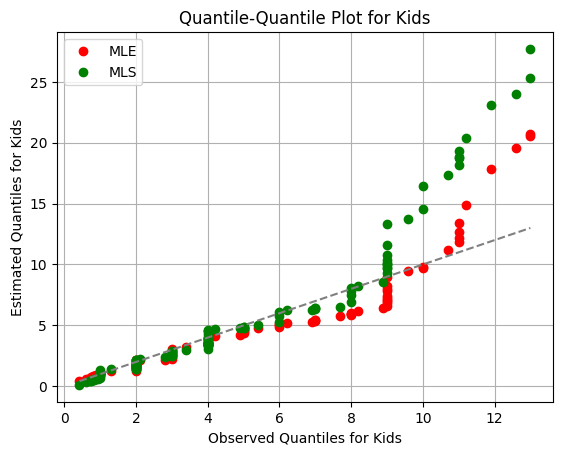

In [ ]:
# Квантили для наблюдаемых данных о возрасте детей и предполагаемого распределения
observed_quantiles_kids = np.percentile(kids, np.linspace(0, 100, 101))
kids_quantiles_MLE = np.percentile(kids_samples_MLE, np.linspace(0, 100, 101))
kids_quantiles_MLS = np.percentile(kids_samples_MLS, np.linspace(0, 100, 101))

# Построение QQ графика
plt.plot(observed_quantiles_kids, kids_quantiles_MLE, 'o', color='r', label='MLE')
plt.plot(observed_quantiles_kids, kids_quantiles_MLS, 'o', color='g', label='MLS')
plt.plot([min(observed_quantiles_kids), max(observed_quantiles_kids)], [min(observed_quantiles_kids), max(observed_quantiles_kids)], '--', color='gray')
plt.legend()
plt.xlabel('Observed Quantiles for Kids')
plt.ylabel('Estimated Quantiles for Kids')
plt.title('Quantile-Quantile Plot for Kids')
plt.grid(True)
plt.show()

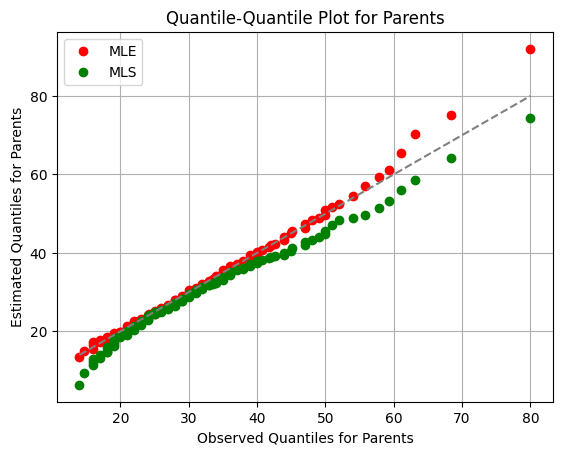

In [ ]:
# Квантили для наблюдаемых данных о возрасте родителей и предполагаемого распределения
observed_quantiles_parents = np.percentile(parents, np.linspace(0, 100, 101))
parents_quantiles_MLE = np.percentile(parents_samples_MLE, np.linspace(0, 100, 101))
parents_quantiles_MLS = np.percentile(parents_samples_MLS, np.linspace(0, 100, 101))

# Построение QQ графика
plt.plot(observed_quantiles_parents, parents_quantiles_MLE, 'o', color='r', label='MLE')
plt.plot(observed_quantiles_parents, parents_quantiles_MLS, 'o', color='g', label='MLS')
plt.plot([min(observed_quantiles_parents), max(observed_quantiles_parents)], [min(observed_quantiles_parents), max(observed_quantiles_parents)], '--', color='gray')
plt.xlabel('Observed Quantiles for Parents')
plt.ylabel('Estimated Quantiles for Parents')
plt.title('Quantile-Quantile Plot for Parents')
plt.legend()
plt.grid(True)
plt.show()

На графике квантиль-квантиль по оси x отображаются квантили наблюдаемых данных, а по оси y - квантили оцененного распределения.

Графики были отдельно построены для двух групп данных.

Точки данных о возрасте детей и родителей на графике лежат близко к прямой y=x, это указывает на то, что наблюдаемые данные соответствуют предполагаемым гамма-распределениям. Модель хорошо подходит для описания данных.

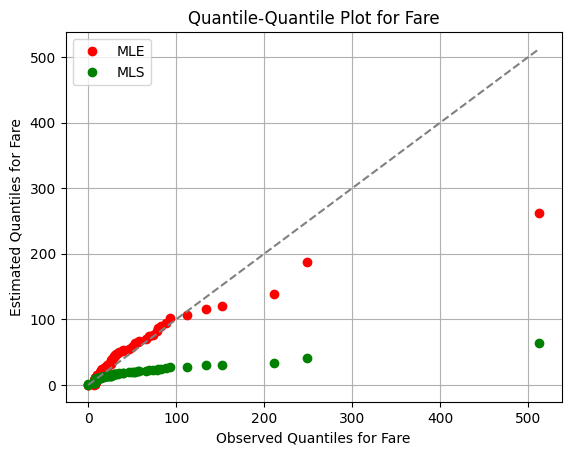

In [ ]:
# Генерирация случайной выборки из расчетного гамма-распределения
fare_samples_MLE = stats.gamma.rvs(a=mmp_gamma(subset['Fare'])[0], scale=mmp_gamma(subset['Fare'])[1], size=len(subset['Fare']))
fare_samples_MLS = stats.gamma.rvs(a=alpha4, scale=scale4, size=len(subset['Fare']))

# Квантили для наблюдаемых данных о стоимости проезда и предполагаемого распределения
observed_quantiles_fare = np.percentile(subset['Fare'], np.linspace(0, 100, 101))
fare_quantiles_MLE = np.percentile(fare_samples_MLE, np.linspace(0, 100, 101))
fare_quantiles_MLS = np.percentile(fare_samples_MLS, np.linspace(0, 100, 101))

# Построение QQ графика
plt.plot(observed_quantiles_fare, fare_quantiles_MLE, 'o', color='r', label='MLE')
plt.plot(observed_quantiles_fare, fare_quantiles_MLS, 'o', color='g', label='MLS')
plt.plot([min(observed_quantiles_fare), max(observed_quantiles_fare)], [min(observed_quantiles_fare), max(observed_quantiles_fare)], '--', color='gray')
plt.xlabel('Observed Quantiles for Fare')
plt.ylabel('Estimated Quantiles for Fare')
plt.title('Quantile-Quantile Plot for Fare')
plt.legend()
plt.grid(True)
plt.show()

Как видно из графика, точки лежат вдоль прямой y=x. При значении больше 100 точки отклоняются, однако по "ящику с усами" видно, что это выбросы.
Таким образом, гамма-распределение подходит для описания данных о Fare.

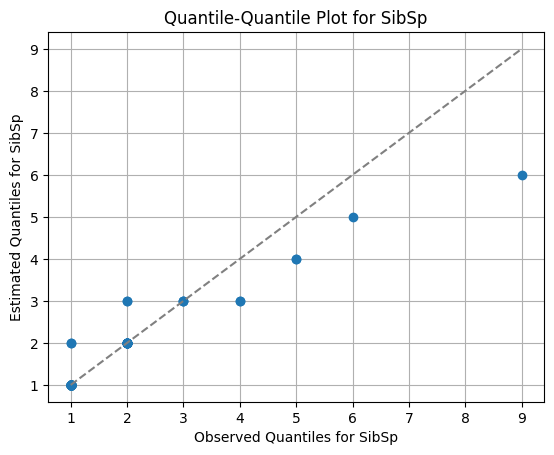

In [ ]:
# Генерирация случайной выборки из расчетного гамма-распределения
sibsp_samples = np.random.geometric(p=p_sibsp_mle, size=len(subset_clean['SibSp']))

# Квантили для наблюдаемых данных о стоимости проезда и предполагаемого распределения
observed_quantiles_sibsp = np.percentile(subset['SibSp']+1, np.linspace(0, 100, 101))
sibsp_quantiles = np.percentile(sibsp_samples, np.linspace(0, 100, 101))

# Построение QQ графика
plt.plot(observed_quantiles_sibsp, sibsp_quantiles, 'o')
plt.plot([min(observed_quantiles_sibsp), max(observed_quantiles_sibsp)], [min(observed_quantiles_sibsp), max(observed_quantiles_sibsp)], '--', color='gray')
plt.xlabel('Observed Quantiles for SibSp')
plt.ylabel('Estimated Quantiles for SibSp')
plt.title('Quantile-Quantile Plot for SibSp')
plt.grid(True)
plt.show()

На графике видно, что распределение точек близко к линии y=x, однако только часть их них располагется на этой прямой. Совсем сильно от прямой отдаляются точки, сооветсвующие значениям, относящимся к выбросам.

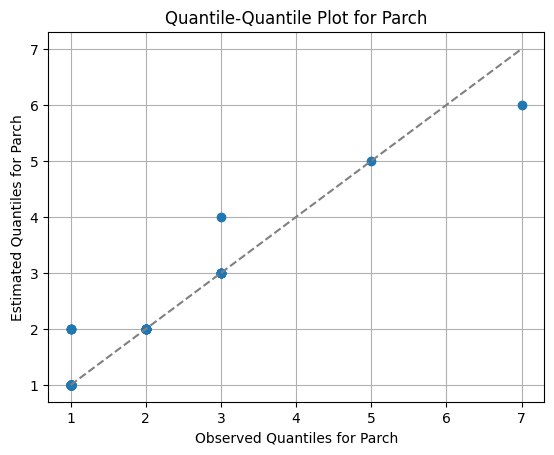

In [ ]:
# Генерирация случайной выборки из расчетного гамма-распределения
parch_samples = np.random.geometric(p=p_parch_mle, size=len(subset_clean['Parch']))

# Квантили для наблюдаемых данных о стоимости проезда и предполагаемого распределения
observed_quantiles_parch = np.percentile(subset['Parch']+1, np.linspace(1, 100, 101))
parch_quantiles = np.percentile(parch_samples, np.linspace(1, 100, 101))

# Построение QQ графика
plt.plot(observed_quantiles_parch, parch_quantiles, 'o')
plt.plot([min(observed_quantiles_parch), max(observed_quantiles_parch)], [min(observed_quantiles_parch), max(observed_quantiles_parch)], '--', color='gray')
plt.xlabel('Observed Quantiles for Parch')
plt.ylabel('Estimated Quantiles for Parch')
plt.title('Quantile-Quantile Plot for Parch')
plt.grid(True)
plt.show()

##### Оценка достоверности подогнанных распределений

In [ ]:
def check(p_val, alpha=0.05):
  if p_val < alpha:
      return ("Отвергаем нулевую гипотезу: между переменными есть статистически значимая связь")
  else:
      return ("Не можем отвергнуть нулевую гипотезу: нет статистически значимой связи между переменными")

1.  Величина Age

In [ ]:
# Тест Колмогорова-Смирнова
ks_statistic_kids, ks_pvalue_kids = stats.ks_2samp(kids, kids_samples_MLE)
ks_statistic_parents, ks_pvalue_parents = stats.ks_2samp(parents, parents_samples_MLE)

# Тест Шапиро-Уилка
shapiro_statistic_kids, shapiro_pvalue_kids = stats.shapiro(kids_samples_MLE)
shapiro_statistic_parents, shapiro_pvalue_parents = stats.shapiro(parents_samples_MLE)

# Вывод результатов
print("Тест Колмогорова-Смирнова для детей:")
print("Статистика:", ks_statistic_kids)
print("P-значение:", ks_pvalue_kids)
print(check(ks_pvalue_kids))

print("\nТест Колмогорова-Смирнова для родителей:")
print("Статистика:", ks_statistic_parents)
print("P-значение:", ks_pvalue_parents)
print(check(ks_pvalue_parents))

print("\nТест Шапиро-Уилка для детей:")
print("Статистика:", shapiro_statistic_kids)
print("P-значение:", shapiro_pvalue_kids)
print(check(shapiro_pvalue_kids))

print("\nТест Шапиро-Уилка для родителей:")
print("Статистика:", shapiro_statistic_parents)
print("P-значение:", shapiro_pvalue_parents)
print(check(shapiro_pvalue_parents))

Тест Колмогорова-Смирнова для детей:
Статистика: 0.15492957746478872
P-значение: 0.36366992583361135
Не можем отвергнуть нулевую гипотезу: нет статистически значимой связи между переменными

Тест Колмогорова-Смирнова для родителей:
Статистика: 0.03110419906687403
P-значение: 0.9151936717134495
Не можем отвергнуть нулевую гипотезу: нет статистически значимой связи между переменными

Тест Шапиро-Уилка для детей:
Статистика: 0.8036134839057922
P-значение: 2.5317488550058442e-08
Отвергаем нулевую гипотезу: между переменными есть статистически значимая связь

Тест Шапиро-Уилка для родителей:
Статистика: 0.9112699031829834
P-значение: 6.3975808105955095e-19
Отвергаем нулевую гипотезу: между переменными есть статистически значимая связь


2. Для величины Fare

In [ ]:
# Тест Колмогорова-Смирнова
ks_statistic_fare, ks_pvalue_fare = stats.ks_2samp(subset['Fare'], fare_samples_MLE)


# Тест Шапиро-Уилка
shapiro_statistic_fare, shapiro_pvalue_fare = stats.shapiro(fare_samples_MLE)

# Вывод результатов
print("Тест Колмогорова-Смирнова для Fare:")
print("Статистика:", ks_statistic_fare)
print("P-значение:", ks_pvalue_fare)
print(check(ks_pvalue_fare))

print("\nТест Шапиро-Уилка для Fare:")
print("Статистика:", shapiro_statistic_fare)
print("P-значение:", shapiro_pvalue_fare)
print(check(shapiro_pvalue_fare))

Тест Колмогорова-Смирнова для Fare:
Статистика: 0.19753086419753085
P-значение: 1.2926541674439684e-15
Отвергаем нулевую гипотезу: между переменными есть статистически значимая связь

Тест Шапиро-Уилка для Fare:
Статистика: 0.7861073613166809
P-значение: 1.379620708084104e-32
Отвергаем нулевую гипотезу: между переменными есть статистически значимая связь


3. Для величины SibSp

In [ ]:
# Преобразование данных в два массива: x (значения Parch) и y (количество)
x = np.array(list(sibsp_counts.keys()))
y = np.array(list(sibsp_counts.values()))

# Сортировка данных
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Пример данных:
observed = prob_mass_func_sibsp
# Рассчитываем ожидаемые частоты
expected = y_sorted

# Тест хи-квадрат
chi2, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

# Выводим результаты
print("Хи-квадрат тест для дискретной величины SibSp:")
print("Хи-квадрат статистика:", round(chi2,4))
print("p-значение:", round(p_val,4))
print(check(p_val))

Хи-квадрат тест для дискретной величины SibSp:
Хи-квадрат статистика: 0.0875
p-значение: 1.0
Не можем отвергнуть нулевую гипотезу: нет статистически значимой связи между переменными


4. Для величины Parch

In [ ]:
# Преобразование данных в два массива: x (значения Parch) и y (количество)
x = np.array(list(parch_counts.keys()))
y = np.array(list(parch_counts.values()))

# Сортировка данных
sorted_indices = np.argsort(x)
x_sorted = x[sorted_indices]
y_sorted = y[sorted_indices]

# Пример данных:
observed = prob_mass_func_parch
# Рассчитываем ожидаемые частоты
expected = y_sorted

# Проводим тест хи-квадрат
chi2, p_val = stats.chisquare(f_obs=observed, f_exp=expected)

# Выводим результаты
print("Хи-квадрат тест для дискретной величины Parch:")
print("Хи-квадрат статистика:", round(chi2,4))
print("p-значение:", round(p_val,4))
print(check(p_val))

Хи-квадрат тест для дискретной величины Parch:
Хи-квадрат статистика: 0.0702
p-значение: 1.0
Не можем отвергнуть нулевую гипотезу: нет статистически значимой связи между переменными


Результаты тестов Колмогорова-Смирнова и хи-квадрат в случае Age(kids и parents), SibSp, Parch не позволяют отвергнуть нулевую гипотезу о том, что подогнанное распределение соответствует исходным данным, это указывает на хорошее соответствие.

Для величины Fare приходится отвергнуть нулевую гипотезу о соответсвии данных теоретическому распределению. Гамма-распределение не подходит для описания этой величины, несмотря на визуально неплохие результаты при построении QQ-графиков.

Тесты Шапиро-Уилка, проведенные на Age и Fare, в обоих случаях отвергают нулевую гипотезу о нормальности теоретического распределения. Действительно, в качестве теоретического распрепределения не было выбрано нормальное распределение ни в одном случае.



---



##### Семплирование

In [ ]:
# Инверсионный метод для гамма-распределения
def inverse_gamma_sampling(shape, scale, size, loc=0):
    u = np.random.rand(size)
    samples = stats.gamma.ppf(u, a=shape, loc=loc, scale=scale)
    return samples

In [ ]:
# Метод Монте-Карло для гамма-распределения
def monte_carlo_gamma_sampling(shape, scale, size, loc=0):
    u = np.random.rand(size)
    samples = stats.gamma.ppf(u, a=shape, loc=loc, scale=scale)
    return samples

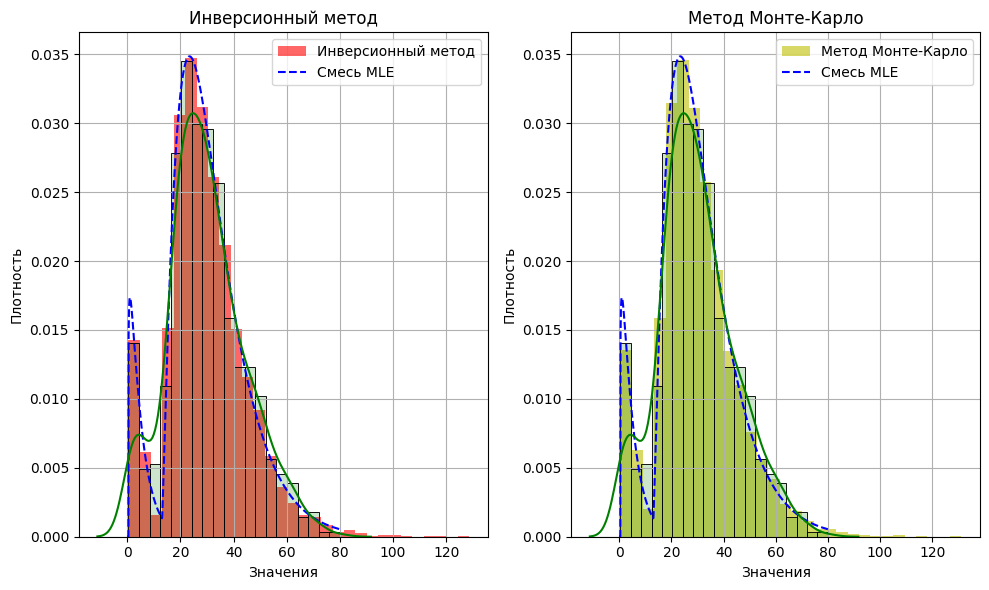

In [ ]:
total_sample = 10000
x = np.linspace(0, max(subset['Age']), 1000)

mixture_pdf = weight * gamma.pdf(x, alpha1, loc=loc1, scale=scale1) + (1 - weight) * gamma.pdf(x, alpha2, loc=loc2, scale=scale2)



# Семплирование данных с использованием инверсионного метода
sampled_data_inverse_1 = inverse_gamma_sampling(alpha2, scale2, size=int(total_sample * (1- weight_kids)), loc=loc2)
sampled_data_inverse_2 = inverse_gamma_sampling(alpha1, scale1, size=int(total_sample * weight_kids), loc=loc1)
sampled_data_inverse = np.concatenate((sampled_data_inverse_1, sampled_data_inverse_2))

plt.figure(figsize=(10, 6))

# Гистограмма с использованием инверсионного метода
plt.subplot(1, 2, 1)
plt.hist(sampled_data_inverse, bins=30, density=True, alpha=0.6, color='r', label='Инверсионный метод')
plt.title('Инверсионный метод')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend()

plt.plot(x, mixture_pdf, label='Смесь MLE', color='b', linestyle='--')
sns.histplot(subset['Age'], kde=True, stat="density", color='g', alpha=0.2, kde_kws=dict(cut=3))
plt.grid(True)
plt.legend()

# Семплирование данных с использованием метода Монте-Карло
sampled_data_monte_carlo_1 = monte_carlo_gamma_sampling(alpha2, scale2, size=int(total_sample * (1- weight_kids)), loc=loc2)
sampled_data_monte_carlo_2 = monte_carlo_gamma_sampling(alpha1, scale1, size=int(total_sample * weight_kids), loc=loc1)
sampled_data_monte_carlo = np.concatenate((sampled_data_monte_carlo_1, sampled_data_monte_carlo_2))

# Гистограмма с использованием метода Монте-Карло
plt.subplot(1, 2, 2)
plt.hist(sampled_data_monte_carlo, bins=30, density=True, alpha=0.6, color='y', label='Метод Монте-Карло')
plt.title('Метод Монте-Карло')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)

plt.plot(x, mixture_pdf, label='Смесь MLE', color='b', linestyle='--')
sns.histplot(subset['Age'], kde=True, stat="density", color='g', alpha=0.2, kde_kws=dict(cut=3))
plt.legend()
plt.tight_layout()
plt.show()

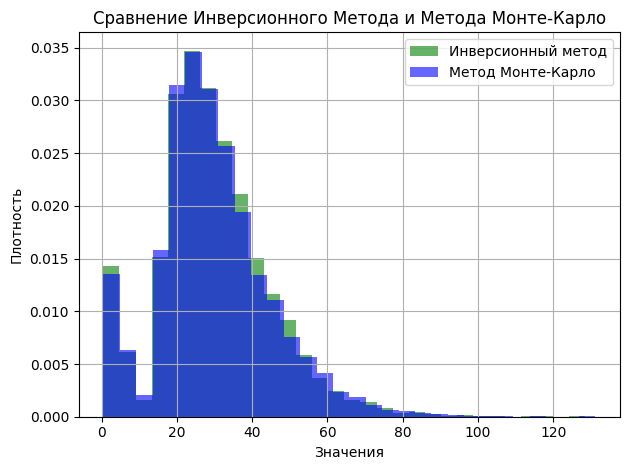

In [ ]:
# Гистограмма с использованием инверсионного метода
plt.hist(sampled_data_inverse, bins=30, density=True, alpha=0.6, color='g', label='Инверсионный метод')
plt.title('Сравнение Инверсионного Метода и Метода Монте-Карло')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)
plt.legend()

# Гистограмма с использованием метода Монте-Карло
plt.hist(sampled_data_monte_carlo, bins=30, density=True, alpha=0.6, color='b', label='Метод Монте-Карло')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Результаты семплирования двух методов практически не отличаются друг от друга.

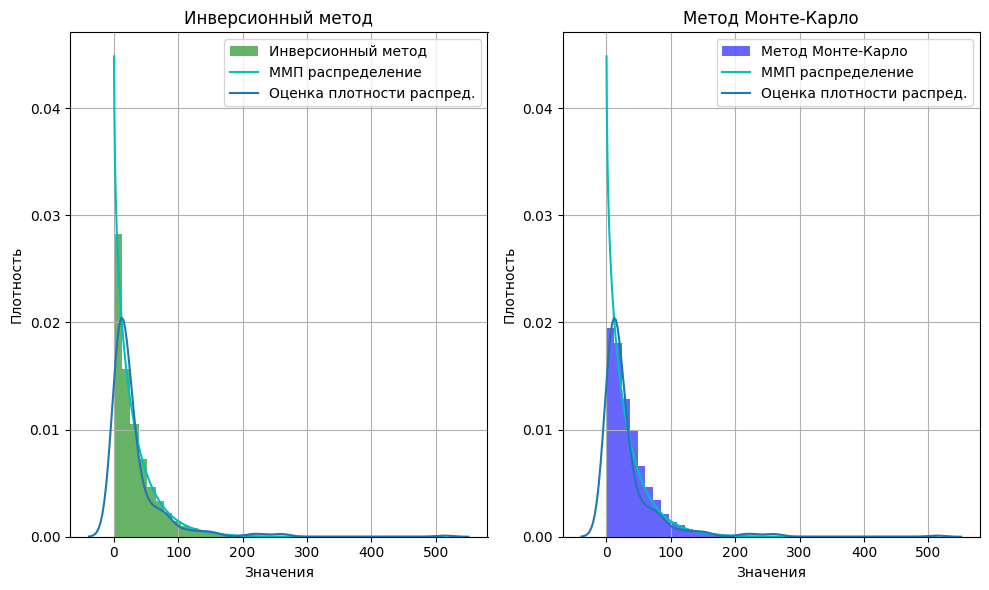

In [ ]:
total_sample = 10000
x = np.linspace(0, max(subset['Fare']), 1000)

# Семплирование данных с использованием инверсионного метода
sampled_data_inverse = inverse_gamma_sampling(mmp_gamma(subset['Fare'])[0], mmp_gamma(subset['Fare'])[1], size=int(total_sample))

plt.figure(figsize=(10, 6))

# Гистограмма с использованием инверсионного метода
plt.subplot(1, 2, 1)
plt.hist(sampled_data_inverse, bins=30, density=True, alpha=0.6, color='g', label='Инверсионный метод')
plt.title('Инверсионный метод')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.legend()

plt.plot(x_gamma, gamma.pdf(x_gamma, a=mmp_gamma(subset['Fare'])[0], scale=mmp_gamma(subset['Fare'])[1]), label=f'ММП распределение ', color='c')
sns.kdeplot(data=subset['Fare'], label='Оценка плотности распред.')
plt.grid(True)
plt.legend()

# Семплирование данных с использованием метода Монте-Карло
sampled_data_monte_carlo = monte_carlo_gamma_sampling(1.2, 1/0.032, size=int(total_sample))

# Гистограмма с использованием метода Монте-Карло
plt.subplot(1, 2, 2)
plt.hist(sampled_data_monte_carlo, bins=30, density=True, alpha=0.6, color='b', label='Метод Монте-Карло')
plt.title('Метод Монте-Карло')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)

plt.plot(x_gamma, gamma.pdf(x_gamma, a=mmp_gamma(subset['Fare'])[0], scale=mmp_gamma(subset['Fare'])[1]), label=f'ММП распределение ', color='c')
sns.kdeplot(data=subset['Fare'], label='Оценка плотности распред.')
plt.legend()
plt.tight_layout()
plt.show()

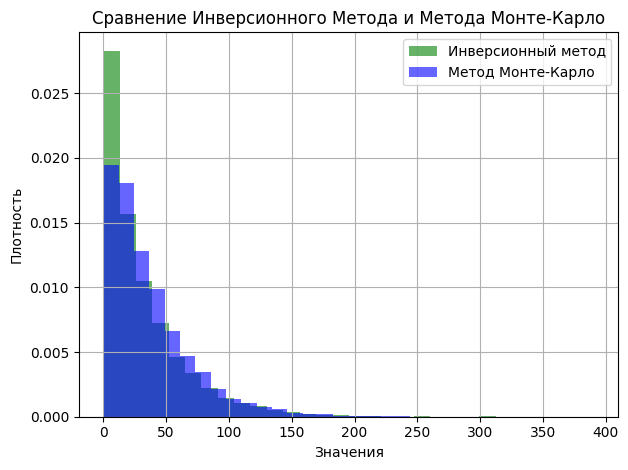

In [ ]:
# Гистограмма с использованием инверсионного метода
plt.hist(sampled_data_inverse, bins=30, density=True, alpha=0.6, color='g', label='Инверсионный метод')
plt.title('Сравнение Инверсионного Метода и Метода Монте-Карло')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)
plt.legend()

# Гистограмма с использованием метода Монте-Карло
plt.hist(sampled_data_monte_carlo, bins=30, density=True, alpha=0.6, color='b', label='Метод Монте-Карло')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

Были использованы одномерные параметрические распределения, подобранные на основе оценок метода максимального правдоподобия, для выполнения семплирования случайных величин. Были реализованы инверсионный метод и метод Монте-Карло.

В итоге было сгенерировано 10000 случайных величин, соответствующих подобранным распределениям для непрерывных величин Age и Fare, и проведено сравнение с ядерной оценкой плотности их распределения.

Можно сделать вывод, что оба метода семплирования, основанные на подобранных параметрических распределениях, позволяют генерировать случайные величины, которые визуально соответствуют ожидаемому распределению.